## Orbital elements to state vectors

In [1]:
import numpy as np

mu = 398600.4418 # km^3/s^2

pi = np.pi
pi2 = 2*np.pi

### Example 4.7

In [2]:
# Write orbital elements in an array
oe = np.zeros(6)

oe[0] = 80000.0          # angular momentum [km^2/s]
oe[1] = 1.4              # eccentricity
oe[2] = np.deg2rad(30.0) # inclination [deg -> radians]
oe[3] = np.deg2rad(60.0) # argument of the perigee [deg -> radians]
oe[4] = np.deg2rad(40.0) # longitude of the ascending node [deg -> radians]
oe[5] = np.deg2rad(30.0) # true anomaly [deg -> radians]

print(oe)

[8.00000000e+04 1.40000000e+00 5.23598776e-01 1.04719755e+00
 6.98131701e-01 5.23598776e-01]


In [9]:
# Calculate the vectors in the perifcal frame
p = oe[0]**2/mu  # semi latus rectum

r = p/(1 + oe[1]*np.cos(oe[5]))
print(f"r = {r} km\n")

rf_vec = np.array([r*np.cos(oe[5]),r*np.sin(oe[5]),0])
vf_vec = np.array([-np.sqrt(mu/p)*np.sin(oe[5]), np.sqrt(mu/p)*(oe[1] + np.cos(oe[5])), 0])
print(f"rf_vec = {rf_vec[0]}, {rf_vec[1]}, {rf_vec[2]}")
print(f"vf_vec = {vf_vec[0]}, {vf_vec[1]}, {vf_vec[2]}")

r = 7257.241360567468 km

rf_vec = 6284.955379646571, 3628.6206802837337, 0.0
vf_vec = -2.4912527612499993, 11.290484088481257, 0.0


In [7]:
# Rotation matrix
R_11 = np.cos(oe[4])*np.cos(oe[3]) - np.sin(oe[4])*np.sin(oe[3])*np.cos(oe[2])
R_12 =-np.cos(oe[4])*np.sin(oe[3]) - np.sin(oe[4])*np.cos(oe[3])*np.cos(oe[2])
R_13 = np.sin(oe[4])*np.sin(oe[2])

R_21 = np.sin(oe[4])*np.cos(oe[3]) + np.cos(oe[4])*np.sin(oe[3])*np.cos(oe[2])
R_22 =-np.sin(oe[4])*np.sin(oe[3]) + np.cos(oe[4])*np.cos(oe[3])*np.cos(oe[2])
R_23 =-np.cos(oe[4])*np.sin(oe[2])

R_31 = np.sin(oe[3])*np.sin(oe[2])
R_32 = np.cos(oe[3])*np.sin(oe[2])
R_33 = np.cos(oe[2])

# A matrix is a 3-dimensional array:
rot_matrix = np.array([[R_11, R_12, R_13],[R_21, R_22, R_23],[R_31, R_32, R_33]])
print(f"rot_matrix = {rot_matrix}")

rot_matrix = [[-0.09906849 -0.94174915  0.3213938 ]
 [ 0.89592714 -0.22496343 -0.38302222]
 [ 0.4330127   0.25        0.8660254 ]]


In [8]:
# Calculating the vectors in the inertial frame
r_vec_inertial = np.matmul(rot_matrix, rf_vec)
print(f"r_vec_inertial = {r_vec_inertial} (km)")
    
v_vec_inertial = np.matmul(rot_matrix, vf_vec)
print(f"v_vec_inertial = {v_vec_inertial} (km/s)")

r_vec_inertial = [-4039.89144547  4814.55514383  3628.62068028] (km)
v_vec_inertial = [-10.38599913  -4.77192693   1.74387693] (km/s)


In [10]:
print(f"Check r_inertial (not required): r_inertial = {np.linalg.norm(r_vec_inertial)} km. It must have the same value of r.")

Check r_inertial (not required): r_inertial = 7257.241360567468 km. It must have the same value of r.


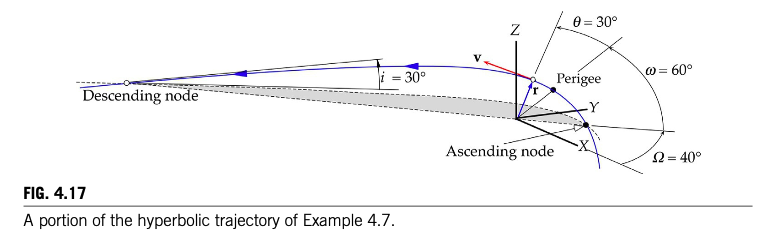